In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("abalone_data.csv") 
df_train.head()
# dobbiamo creare un modello che predica il numero di rings, dopo aver discretizzato l'attributo ring in due intervalli

,sex,lenght,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
len(df_train)

4177

In [4]:
# dobbiamo scartare gli infanti
df_train = df_train[df_train['sex'] != 'I']

len(df_train)

2835

In [5]:
# Non serve la colonna sex nel KNN

# Drop the coloumn sex
df_train = df_train.drop(['sex'], axis=1)


df_train.head()


,lenght,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [6]:
df_train['rings'].describe()

count    2835.000000
mean       10.900882
std         3.069252
min         3.000000
25%         9.000000
50%        10.000000
75%        12.000000
max        29.000000
Name: rings, dtype: float64

(array([   3.,    6.,   15.,   43.,  124.,  294.,  516.,  542.,  425.,
         246.,  179.,  112.,   93.,   60.,   51.,   37.,   30.,   24.,
          13.,    6.,    9.,    2.,    1.,    1.,    2.,    1.]),
 array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
         14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
         25.,  26.,  27.,  28.,  29.]),
 <a list of 26 Patch objects>)

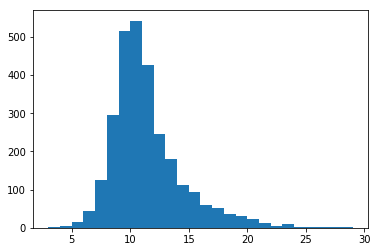

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(df_train['rings'], bins=len(df_train['rings'].unique()))

In [8]:
# discretizzazione dell'attributo rings
III_quart = df_train['rings'].quantile(0.75)        # utilizziamo il terzo quartile

# Generate a mapping of rings, 1 if rings > III quart    
def rings_mapping(x):
    if x > III_quart:
        return 1
    return 0

# Transform rings from an integer to a 0-1 representation
df_train['class'] = df_train['rings'].map(rings_mapping).astype(int)

# Drop the coloumn rings
df_train = df_train.drop(['rings'], axis=1)

In [9]:
# Convert the DataFrame to a numpy array:
train_data = df_train.values
train_data

array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  ,  1.    ],
       [ 0.35  ,  0.265 ,  0.09  , ...,  0.0485,  0.07  ,  0.    ],
       [ 0.53  ,  0.42  ,  0.135 , ...,  0.1415,  0.21  ,  0.    ],
       ..., 
       [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  0.    ],
       [ 0.625 ,  0.485 ,  0.15  , ...,  0.261 ,  0.296 ,  0.    ],
       [ 0.71  ,  0.555 ,  0.195 , ...,  0.3765,  0.495 ,  0.    ]])

In [10]:
# Training data features, skip the last column 'class'
train_features = train_data[:, :len(train_data[0])-1]

# 'class' column values
train_target = train_data[:, len(train_data[0])-1]

In [11]:
from sklearn.cross_validation import train_test_split

train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.10, 
                                                    random_state=0)
# train_x = attributi su cui allenare, training set
# train_y = attributo da classificare, training set
# test_x = attributi su cui allenare, test set
# test_y = attributo da classificare, test set

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
# FINE PREPARAZIONE DATASET

In [13]:
#
# k-NN
#
from sklearn import neighbors
import numpy as np

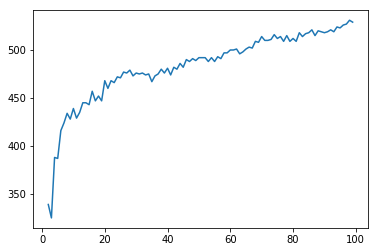

In [14]:
k_max = 100
error_list = list(())
for i in range(2, k_max):
    n_neighbors = i
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
    clf.fit(train_features, train_target)
    error_list.append(sum(abs(np.array(clf.predict(train_features)) - np.array(train_target))))

plt.plot((range(2, k_max)), error_list)

# Il migliore dovrebbe essere k=3

Text(0.5,1,'auc')

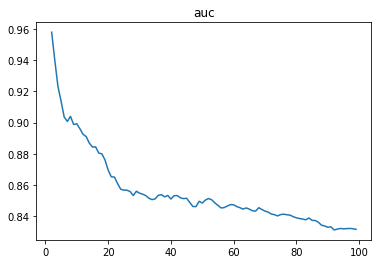

In [15]:
from sklearn.metrics import roc_curve, auc

k_max = 100
auc_list = list(())
for i in range(2, k_max):
    n_neighbors = i
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
    clf.fit(train_features, train_target)
    
    y_score = clf.predict_proba(test_x)     

    fpr, tpr, _ =  roc_curve(test_y, y_score[:,1])
    roc_auc = auc(fpr, tpr)
    
    auc_list.append(roc_auc)
    
plt.plot((range(2, k_max)), auc_list)
plt.title('auc')

# i migliori sembrano 2 e 3

In [16]:
# Cerchiamo i parametri migliori con il metodo del prof

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [17]:
clf = neighbors.KNeighborsClassifier()

param_dist = {"n_neighbors": list(range(2,50)),
              "weights": ['uniform']
             }

n_iter_search = len(param_dist["n_neighbors"])*len(param_dist["weights"])

search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, 
                            n_jobs=10, scoring=make_scorer(accuracy_score))

In [18]:
search.fit(train_features, train_target)

report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]
# non viene 3, viene 37

Model with rank: 1
Mean validation score: 0.824 (std: 0.003)
Parameters: {'weights': 'uniform', 'n_neighbors': 11}

Model with rank: 2
Mean validation score: 0.823 (std: 0.004)
Parameters: {'weights': 'uniform', 'n_neighbors': 13}

Model with rank: 3
Mean validation score: 0.822 (std: 0.011)
Parameters: {'weights': 'uniform', 'n_neighbors': 21}

Model with rank: 3
Mean validation score: 0.822 (std: 0.013)
Parameters: {'weights': 'uniform', 'n_neighbors': 27}



In [19]:
# Proviamo con grid search invece che randomized search
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors": list(range(2,50)),
              "weights": ['uniform']
             }

#n_iter_search = len(param_dist["n_neighbors"])*len(param_dist["weights"])

search = GridSearchCV(clf, param_grid=param_grid, scoring=make_scorer(accuracy_score))
search.fit(train_features, train_target)
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]

# come sopra

Model with rank: 1
Mean validation score: 0.824 (std: 0.003)
Parameters: {'weights': 'uniform', 'n_neighbors': 11}

Model with rank: 2
Mean validation score: 0.823 (std: 0.004)
Parameters: {'weights': 'uniform', 'n_neighbors': 13}

Model with rank: 3
Mean validation score: 0.822 (std: 0.011)
Parameters: {'weights': 'uniform', 'n_neighbors': 21}

Model with rank: 3
Mean validation score: 0.822 (std: 0.013)
Parameters: {'weights': 'uniform', 'n_neighbors': 27}



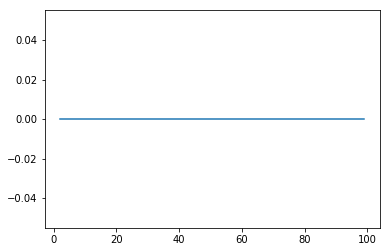

In [20]:
# Proviamo con weight = distance

k_max = 100
error_list = list(())
for i in range(2, k_max):
    n_neighbors = i
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(train_features, train_target)
    error_list.append(sum(abs(np.array(clf.predict(train_features)) - np.array(train_target))))

plt.plot((range(2, k_max)), error_list)

# Fa tutto giusto per ogni k
# Proviamo a non usare tutto il dataset come trainig set

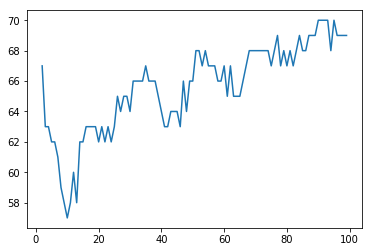

In [21]:
# RICORDA    train_x, test_x, train_y, test_y = train_test_split(train_features, train_target, test_size=0.10, random_state=0)

k_max = 100
error_list = list(())
for i in range(2, k_max):
    n_neighbors = i
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(train_x, train_y)
    error_list.append(sum(abs(np.array(clf.predict(test_x)) - np.array(test_y))))

plt.plot((range(2, k_max)), error_list)

# sembra un po piu interessante

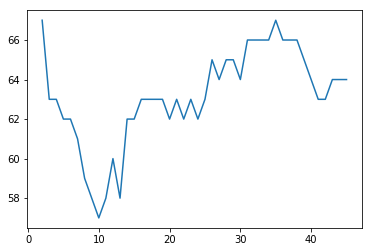

In [22]:
k_max = 46
error_list = list(())
for i in range(2, k_max):
    n_neighbors = i
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(train_x, train_y)
    error_list.append(sum(abs(np.array(clf.predict(test_x)) - np.array(test_y))))

plt.plot((range(2, k_max)), error_list)

# i migliori sono 10 e 14

Text(0.5,1,'auc')

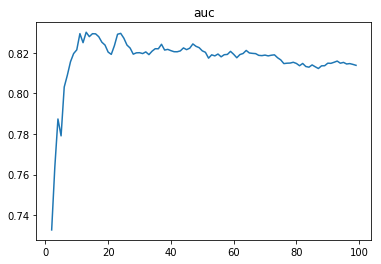

In [23]:
k_max = 100
auc_list = list(())
for i in range(2, k_max):
    n_neighbors = i
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(train_x, train_y)    
    
    y_score = clf.predict_proba(test_x)     

    fpr, tpr, _ =  roc_curve(test_y, y_score[:,1])
    roc_auc = auc(fpr, tpr)
    
    auc_list.append(roc_auc)
    
plt.plot((range(2, k_max)), auc_list)
plt.title('auc')

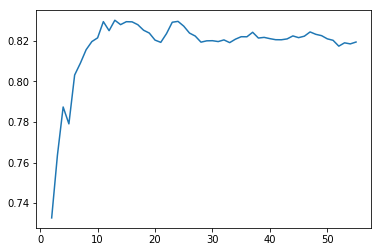

In [24]:
k_max = 56
auc_list = list(())
for i in range(2, k_max):
    n_neighbors = i
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(train_x, train_y)    
    
    y_score = clf.predict_proba(test_x)     

    fpr, tpr, _ =  roc_curve(test_y, y_score[:,1])
    roc_auc = auc(fpr, tpr)
    
    auc_list.append(roc_auc)
    
plt.plot((range(2, k_max)), auc_list)

# 11, 13

In [25]:
clf = neighbors.KNeighborsClassifier()

param_dist = {"n_neighbors": list(range(2,50)),
              "weights": ['uniform']
             }

n_iter_search = len(param_dist["n_neighbors"])*len(param_dist["weights"])

search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, 
                            n_jobs=10, scoring=make_scorer(accuracy_score))
search.fit(train_x, train_y)
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]
# qua dà 44 e 42

Model with rank: 1
Mean validation score: 0.833 (std: 0.008)
Parameters: {'weights': 'uniform', 'n_neighbors': 13}

Model with rank: 2
Mean validation score: 0.833 (std: 0.008)
Parameters: {'weights': 'uniform', 'n_neighbors': 15}

Model with rank: 3
Mean validation score: 0.832 (std: 0.010)
Parameters: {'weights': 'uniform', 'n_neighbors': 19}

Model with rank: 3
Mean validation score: 0.832 (std: 0.007)
Parameters: {'weights': 'uniform', 'n_neighbors': 21}



In [26]:
# Proviamo con grid search invece che randomized search

param_grid = {"n_neighbors": list(range(2,50)),
              "weights": ['uniform']
             }

n_iter_search = len(param_dist["n_neighbors"])*len(param_dist["weights"])

search = GridSearchCV(clf, param_grid=param_grid, scoring=make_scorer(accuracy_score))
search.fit(train_x, train_y)
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]
# come sopra

Model with rank: 1
Mean validation score: 0.833 (std: 0.008)
Parameters: {'weights': 'uniform', 'n_neighbors': 13}

Model with rank: 2
Mean validation score: 0.833 (std: 0.008)
Parameters: {'weights': 'uniform', 'n_neighbors': 15}

Model with rank: 3
Mean validation score: 0.832 (std: 0.010)
Parameters: {'weights': 'uniform', 'n_neighbors': 19}

Model with rank: 3
Mean validation score: 0.832 (std: 0.007)
Parameters: {'weights': 'uniform', 'n_neighbors': 21}



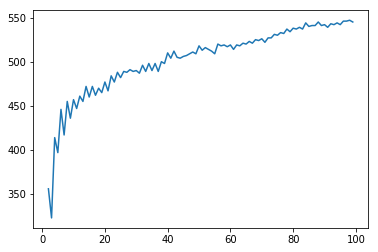

In [27]:
# Proviamo con gli attributi normalizzati, weight = uniform

train_features_norm = (train_features - train_features.mean(axis=0))/ train_features.std(axis=0)

k_max = 100
error_list = list(())
for i in range(2, k_max):
    n_neighbors = i
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
    clf.fit(train_features_norm, train_target)
    error_list.append(sum(abs(np.array(clf.predict(train_features_norm)) - np.array(train_target))))
    
plt.plot((range(2, k_max)), error_list)

# I migliori sembrano 2 e 4

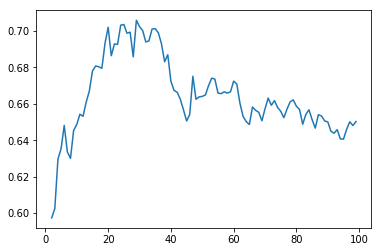

In [28]:
k_max = 100
auc_list = list(())
for i in range(2, k_max):
    n_neighbors = i
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
    clf.fit(train_features_norm, train_target)
    
    y_score = clf.predict_proba(test_x)     

    fpr, tpr, _ =  roc_curve(test_y, y_score[:,1])
    roc_auc = auc(fpr, tpr)
    
    auc_list.append(roc_auc)
    
plt.plot((range(2, k_max)), auc_list)
# 22

In [29]:
clf = neighbors.KNeighborsClassifier()

param_dist = {"n_neighbors": list(range(2,50)),
              "weights": ['uniform']
             }

n_iter_search = len(param_dist["n_neighbors"])*len(param_dist["weights"])

search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, 
                            n_jobs=10, scoring=make_scorer(accuracy_score))
search.fit(train_features_norm, train_target)
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]
# invece qua dà 35 e 39

Model with rank: 1
Mean validation score: 0.817 (std: 0.009)
Parameters: {'weights': 'uniform', 'n_neighbors': 21}

Model with rank: 2
Mean validation score: 0.817 (std: 0.010)
Parameters: {'weights': 'uniform', 'n_neighbors': 15}

Model with rank: 3
Mean validation score: 0.817 (std: 0.009)
Parameters: {'weights': 'uniform', 'n_neighbors': 19}

Model with rank: 3
Mean validation score: 0.817 (std: 0.010)
Parameters: {'weights': 'uniform', 'n_neighbors': 23}



In [30]:
# Proviamo con grid search invece che randomized search

param_grid = {"n_neighbors": list(range(2,50)),
              "weights": ['uniform']
             }

n_iter_search = len(param_dist["n_neighbors"])*len(param_dist["weights"])

search = GridSearchCV(clf, param_grid=param_grid, scoring=make_scorer(accuracy_score))
search.fit(train_features_norm, train_target)
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]
# come sopra

Model with rank: 1
Mean validation score: 0.817 (std: 0.009)
Parameters: {'weights': 'uniform', 'n_neighbors': 21}

Model with rank: 2
Mean validation score: 0.817 (std: 0.010)
Parameters: {'weights': 'uniform', 'n_neighbors': 15}

Model with rank: 3
Mean validation score: 0.817 (std: 0.009)
Parameters: {'weights': 'uniform', 'n_neighbors': 19}

Model with rank: 3
Mean validation score: 0.817 (std: 0.010)
Parameters: {'weights': 'uniform', 'n_neighbors': 23}



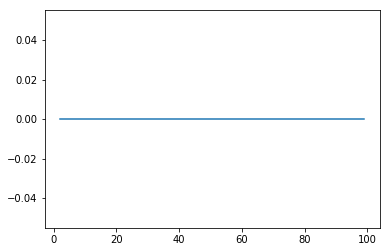

In [31]:
# Proviamo con weight = distance

# RICORDA    train_features_norm = (train_features - train_features.mean(axis=0))/ train_features.std(axis=0)

k_max = 100
error_list = list(())
for i in range(2, k_max):
    n_neighbors = i
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(train_features_norm, train_target)
    error_list.append(sum(abs(np.array(clf.predict(train_features_norm)) - np.array(train_target))))

plt.plot((range(2, k_max)), error_list)

# Viene di nuovo tutto giusto

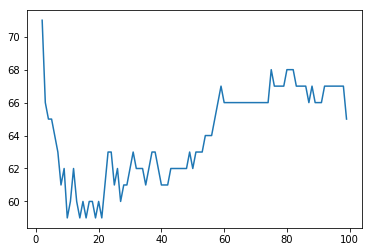

In [32]:
train_xN, test_xN, train_yN, test_yN = train_test_split(train_features_norm, train_target, test_size=0.10, random_state=0)

k_max = 100
error_list_test = list(())
for i in range(2, k_max):
    n_neighbors = i
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(train_xN, train_yN)
    error_list_test.append(sum(abs(np.array(clf.predict(test_xN)) - np.array(test_yN))))

plt.plot((range(2, k_max)), error_list_test)

# sembra un po' più interessante, di nuovo
# difficile capire i migliori

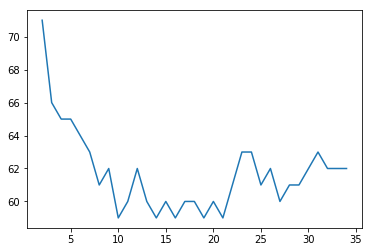

In [33]:
k_max = 35
error_list_test = list(())
for i in range(2, k_max):
    n_neighbors = i
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(train_xN, train_yN)
    error_list_test.append(sum(abs(np.array(clf.predict(test_xN)) - np.array(test_yN))))

plt.plot((range(2, k_max)), error_list_test)

# i migliori sono 10, 14, 16...

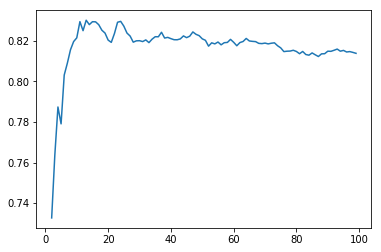

In [34]:
k_max = 100
auc_list = list(())
for i in range(2, k_max):
    n_neighbors = i
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(train_x, train_y)    
    
    y_score = clf.predict_proba(test_x)     

    fpr, tpr, _ =  roc_curve(test_y, y_score[:,1])
    roc_auc = auc(fpr, tpr)
    
    auc_list.append(roc_auc)
    
plt.plot((range(2, k_max)), auc_list)
# valori buoni

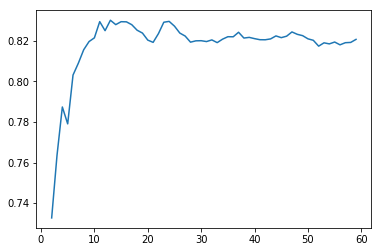

In [35]:
k_max = 60
auc_list = list(())
for i in range(2, k_max):
    n_neighbors = i
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(train_x, train_y)    
    
    y_score = clf.predict_proba(test_x)     

    fpr, tpr, _ =  roc_curve(test_y, y_score[:,1])
    roc_auc = auc(fpr, tpr)
    
    auc_list.append(roc_auc)
    
plt.plot((range(2, k_max)), auc_list)
# 12 e 14

In [36]:
clf = neighbors.KNeighborsClassifier()

param_dist = {"n_neighbors": list(range(2,50)),
              "weights": ['uniform']
             }

n_iter_search = len(param_dist["n_neighbors"])*len(param_dist["weights"])

search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, 
                            n_jobs=10, scoring=make_scorer(accuracy_score))
search.fit(train_xN, train_yN)
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]
# qua dà 30 e 31

Model with rank: 1
Mean validation score: 0.829 (std: 0.006)
Parameters: {'weights': 'uniform', 'n_neighbors': 11}

Model with rank: 2
Mean validation score: 0.828 (std: 0.003)
Parameters: {'weights': 'uniform', 'n_neighbors': 17}

Model with rank: 3
Mean validation score: 0.828 (std: 0.004)
Parameters: {'weights': 'uniform', 'n_neighbors': 13}



In [37]:
# Proviamo con grid search invece che randomized search

param_grid = {"n_neighbors": list(range(2,50)),
              "weights": ['uniform']
             }

n_iter_search = len(param_dist["n_neighbors"])*len(param_dist["weights"])

search = GridSearchCV(clf, param_grid=param_grid, scoring=make_scorer(accuracy_score))
search.fit(train_xN, train_yN)
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]
# come sopra

Model with rank: 1
Mean validation score: 0.829 (std: 0.006)
Parameters: {'weights': 'uniform', 'n_neighbors': 11}

Model with rank: 2
Mean validation score: 0.828 (std: 0.003)
Parameters: {'weights': 'uniform', 'n_neighbors': 17}

Model with rank: 3
Mean validation score: 0.828 (std: 0.004)
Parameters: {'weights': 'uniform', 'n_neighbors': 13}



In [38]:
# QUINDI QUALI PARAMETRI SCEGLIERE?? USANDO TUTTO IL DATASET COME TRAINING SET O SOLO UNA PARTE??